# **ამოცანა**


**პრობლემის აღწერა**

კომპანია აწარმოებს და ყიდის ელექტრონულ მოწყობილობებს ონლაინ პლატფორმის საშუალებით. მენეჯმენტს სურს, გაიგოს, რა ფაქტორები ახდენენ გავლენას პროდუქტის საბოლოო გასაყიდ ფასზე. ჩვენი მონაცემები შეიცავს ინფორმაციას წარმოების ხარჯების, მარკეტინგული დანახარჯების, კონკურენტების ფასებისა და ბაზრის მოთხოვნის შესახებ.

**ამოცანის მიზანი**

ავაგოთ მოდელი, რომელიც შეგვაძლებინებს დავაპროგნოზოთ პროდუქტის ოპტიმალური გასაყიდი ფასი სხვადასხვა ფაქტორის გათვალისწინებით. ეს მოდელი დაეხმარება კომპანიას უკეთ დაგეგმოს ფასწარმოქმნის სტრატეგია და გაზარდოს მოგება.


**ველის სახელი** | **აღწერა**
--------------|-------------
`Production_Cost` | პროდუქტის წარმოების ხარჯი (დოლარებში)
`Marketing_Spend` | მარკეტინგული დანახარჯები (დოლარებში)
`Competitor_Price` | კონკურენტების საშუალო ფასი (დოლარებში)
`Market_Demand` | ბაზრის მოთხოვნის ინდექსი (1-100 შკალაზე)
`Final_Price` | პროდუქტის საბოლოო გასაყიდი ფასი (დოლარებში)


## **1:** მონაცემების ჩატვირთვა და დათვალიერება


In [7]:
# დაასრულეთ კოდი

import pandas as pd, numpy as np
import warnings

warnings.filterwarnings("ignore")

# მონაცემების ჩატვირთვა
df = pd.read_csv("product_pricing.csv")

# პირველი რამდენიმე მწკრივი
print(df.head())
# ზოგადი ინფო
print(df.info())
# ველების სტატისტიკა
print(df.describe())

   Production_Cost  Marketing_Spend  Competitor_Price  Market_Demand  \
0           114.90            31.19            172.99           82.0   
1            95.85            27.40            194.22           98.0   
2           119.43            20.48            168.30           27.0   
3           145.69            14.82            187.68           97.0   
4            92.98            25.59            124.26           44.0   

   Final_Price  
0       315.52  
1       296.38  
2       310.79  
3       370.37  
4       247.33  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Production_Cost   1000 non-null   float64
 1   Marketing_Spend   1000 non-null   float64
 2   Competitor_Price  1000 non-null   float64
 3   Market_Demand     1000 non-null   float64
 4   Final_Price       1000 non-null   float64
dtypes: float64(5)
memory usage

## **2:** ცვლადების ინჟინერია
- ნორმალიზება გაუკეთეთ შემდეგ ველებს z-score ფორმულით: `Production_Cost, Marketing_Spend, Competitor_Price, Market_Demand`

  $$ z = \frac{x - \mu}{\sigma} $$
  
    სადაც თითოეული ველისთვის:
    - $x$ არის შესაბამისი ველის მნიშვნელობები
    - $\mu$ არის ველის საშუალო (`.mean()`)
    - $\sigma$ არის ველის სტანდარტული გადახრა (`.std()`)


- შექმენით მარკეტინგული ხარჯისა და წარმოების ხარჯის თანაფარდობის ველი

In [8]:
# Z-score მეთოდით ნორმალიზება
for column in ["Production_Cost", "Marketing_Spend", "Competitor_Price", "Market_Demand"]:
    df[f"{column}_zscore"] = (df[column] - df[column].mean()) / df[column].std()

# მარკეტინგული ხარჯისა და წარმოების ხარჯის თანაფარდობა
df["Marketing_to_Production_Ratio"] = df["Marketing_Spend"] / df["Production_Cost"]

## **3:** მონაცემების დაყოფა


In [9]:
# დაასრულეთ კოდი

from sklearn.model_selection import train_test_split

# ამხსნელი ცვლადების და სამიზნის განსაზღვრა
# ამხსნელი
X =df[["Production_Cost_zscore", "Marketing_Spend_zscore", "Competitor_Price_zscore", "Market_Demand_zscore", "Marketing_to_Production_Ratio"]]
#სამიზნე
y =df["Final_Price"]

# მონაცემების გაყოფა საწვრთნელად და სატესტოდ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# შემოწმება
print(X_train.shape, X_test.shape)

(800, 5) (200, 5)


## **4:** მოდელის გაწვრთნა და პროგნოზი

In [10]:
# დაასრულეთ კოდი

from sklearn.linear_model import LinearRegression

# მოდელის წვრთნა
model = LinearRegression()
model.fit(X_train, y_train)

print("კოეფიციენტები:", model.coef_)
print("თანაკვეთა:", model.intercept_)

# პროგნოზები სატესტო მონაცემებზე
y_pred = model.predict(X_test)
print("საპროგნოზო ფასები:", y_pred)


კოეფიციენტები: [ 55.93735968   5.21681832  12.26354181   5.78684552 -14.44954726]
თანაკვეთა: 284.973812404399
საპროგნოზო ფასები: [351.8167104  329.71865088 177.87859804 245.94010729 227.95848181
 334.28495452 229.87257537 208.82926917 323.26904481 231.93566493
 238.27042395 287.43603367 337.04626783 272.98017501 282.79076888
 224.61679958 268.12264793 343.00171741 271.05263771 258.03886491
 276.46590523 280.17942518 310.67950743 303.10963996 296.8871062
 339.84982902 228.50165456 370.86586694 277.51361161 212.93671393
 182.90299239 197.75253978 316.31509462 211.46436704 277.530527
 277.74806386 240.30664898 315.52057306 251.60131907 341.10489113
 315.9703461  306.95342844 339.86735418 254.34975208 298.40283192
 225.37317481 369.74822741 234.29075289 257.25617241 246.8071105
 275.60009216 339.67425351 276.65127358 182.76195224 175.88387723
 259.52835214 314.44632875 231.51197579 178.25127016 237.80057596
 337.88022437 319.0108707  317.53540461 514.38028399 303.72315194
 222.20368472 280

## **5:** მოდელის შეფასება
  - საშუალო აბსოლუტური ცდომილება (MAE - Mean Absolute Error)
  - საშუალო კვადრატული ცდომილება (MSE - Mean Squared Error)
  - საშუალო კვადრატული ცდომილების ფესვი (RMSE - Root Mean Squared Error)
  - დეტერმინაციის კოეფიციენტი ($R^2$)


In [13]:
# დაასრულეთ კოდი

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# საზომები
mae = mean_absolute_error( y_test, y_pred )
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score( y_test, y_pred)

# საზომების ბეჭდვა
print("\nმოდელის საზომები:")
print(f"საშუალო აბსოლუტური ცდომილება (MAE): {mae}")
print(f"საშუალო კვადრატული ცდომილება (MSE): {mse}")
print(f"საშუალო კვადრატული ცდომილების ფესვი (RMSE): {rmse}")
print(f"დეტერმინაციის კოეფიციენტი (R²): {r2}")



მოდელის საზომები:
საშუალო აბსოლუტური ცდომილება (MAE): 8.135107823339256
საშუალო კვადრატული ცდომილება (MSE): 103.4487754987535
საშუალო კვადრატული ცდომილების ფესვი (RMSE): 10.17097711622406
დეტერმინაციის კოეფიციენტი (R²): 0.9711621880976733


**მიღებული შედეგი აჩვენებს, რომ მოდელი საკმაოდ კარგად მუშაობას
(მაგ: დეტერმინაციის კოეფიციენტი მეტია 0.9-ზე, ასევე ცდომილებებშიც დაბალი მაჩვენებელი გამოიკვეთა)**

## **6:** რეალური და პროგნოზირებული მნიშვნელობების შედარება


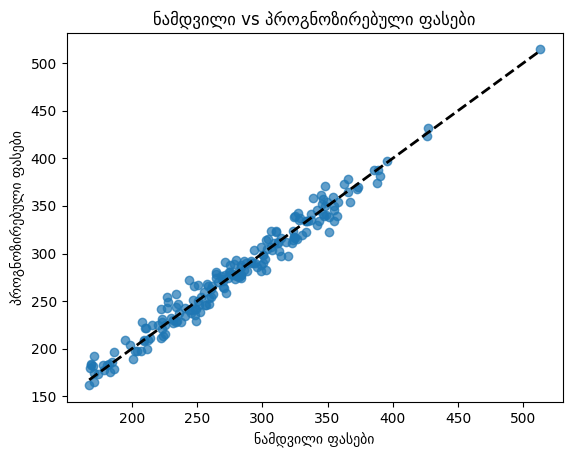

In [16]:
# დაასრულეთ კოდი

import matplotlib.pyplot as plt

# ააგეთ პროგნოზებისა და ნამდვილი ფასების გაფანტულობის დიაგრამა
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('ნამდვილი ფასები')
plt.ylabel('პროგნოზირებული ფასები')
plt.title('ნამდვილი vs პროგნოზირებული ფასები')
plt.show()
